Populating the interactive namespace from numpy and matplotlib
0.56012987013
0.0137501432871
0.616033966034
0.012040756947
0.60955044955
0.0118568406504


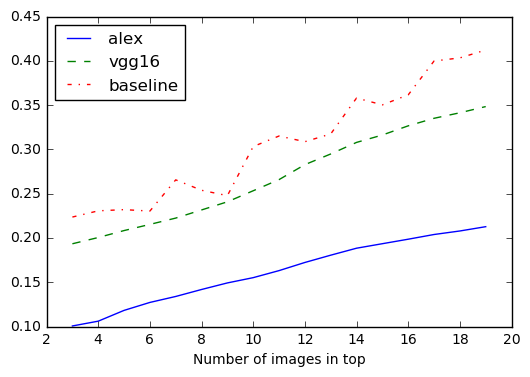

In [4]:
%pylab inline
# import matplotlib
# matplotlib.use('Agg')

import pandas as pd
import numpy as np
import sys
true_file = "gt_ex.csv"
params = [('-', 'alex', 'alex_1_nn_ex.csv'),
         ('--', 'vgg16', 'vgg16_1_nn_ex.csv'),
         ('-.', 'baseline', '1_base_ex.csv')]

def jaccard(true, predicted, N):
    true_args = np.argsort(true, axis = 1)[:, (-N):]
    predicted_args = np.argsort(predicted, axis = 1)[:, (-N):]
    
    measurments = []
    for i in range(true_args.shape[0]):
        first = set(true_args[i])
        second = set(predicted_args[i])
        measurments.append(len(first & second) / len(first | second))
    return np.mean(measurments)

def compute_measure(true, predicted):
    measurments = []
    n_range = list(range(3, 20))
    for N in n_range:
        measurments.append(jaccard(true, predicted, N))
    return n_range, measurments

true = np.array(pd.read_csv('results_sw2/' + true_file, index_col = 'image_id'))
true_2 = np.array(pd.read_csv('results_sw2/' + 'gt_in.csv', index_col = 'image_id'))

for ls, label, file in params:
    predicted = np.array(pd.read_csv('results_sw2/' + file, index_col = 'image_id'))
    print ((true * predicted > 0).mean())
    print (((true - predicted) ** 2).mean())
    plt.plot(*compute_measure(true, predicted), label = label, ls = ls)
    plt.legend(loc=2)
    plt.xlabel('Number of images in top')
    
plt.savefig('plot1.pdf', bbox_inches='tight')

In [6]:
((true - true_2) ** 2).mean()

0.0011037316705944415